# Final Part 2 Tyler Frazer

In [34]:
# Standard Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# model & metric imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# For label encoding
from sklearn.preprocessing import LabelEncoder

In [2]:
# Get the data into a datframe
weather_df = pd.read_csv('seattle-weather.csv')

In [3]:
# See first 10 rows
weather_df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
# display the column headings of the dataframe
weather_df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [6]:
# What are the counts of the types of weather in our dataset
weather_df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

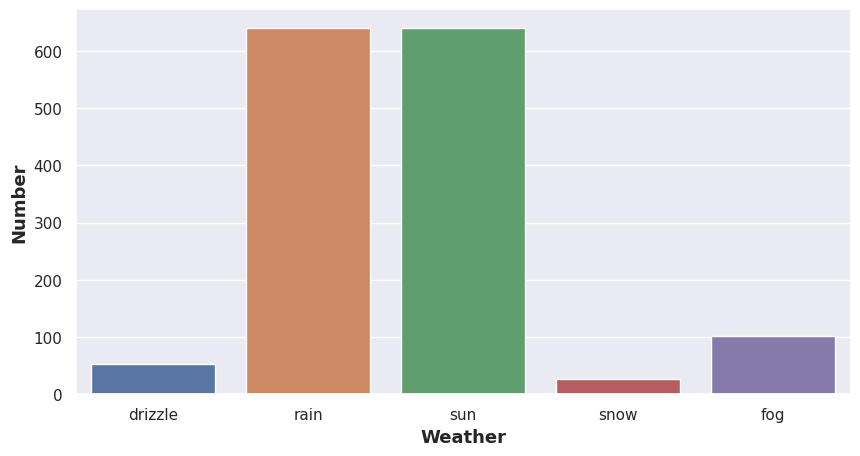

In [ ]:
# Bar Chart (plotting help from https://www.kaggle.com/code/eniola12/eda-on-weather-data)

plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = weather_df)
plt.xlabel("Weather",fontweight='bold',size=13)
plt.ylabel("Number",fontweight='bold',size=13)
plt.show()

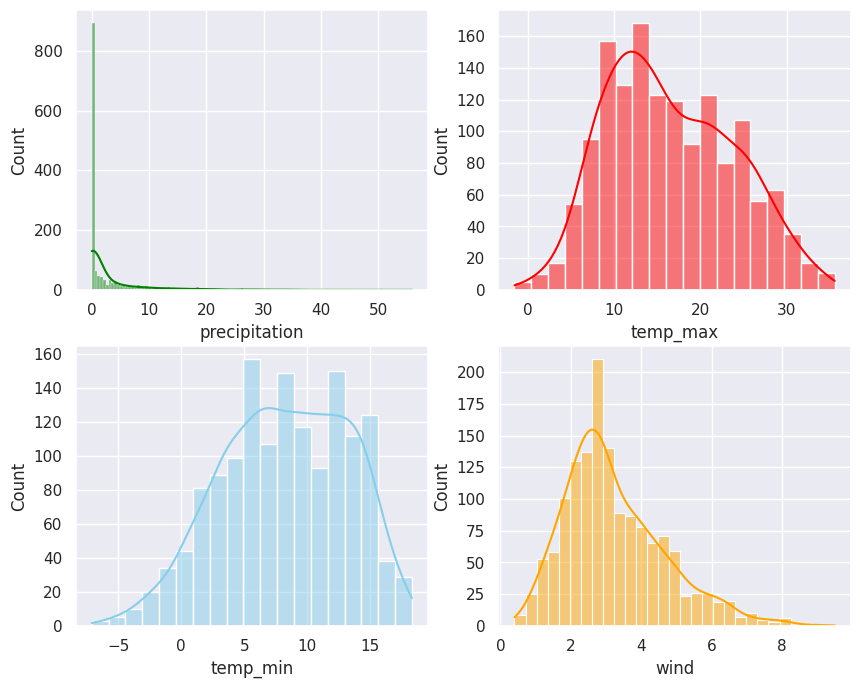

In [ ]:
# Histogram for distribution (plotting help from https://www.kaggle.com/code/eniola12/eda-on-weather-data)
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=weather_df,x="precip",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=weather_df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=weather_df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=weather_df,x="wind",kde=True,ax=axs[1,1],color='orange')
plt.savefig('Histogram showing the distribution of numerical variables in the dataset')

<ipython-input-72-8a1073f295e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlations = weather_df.corr();


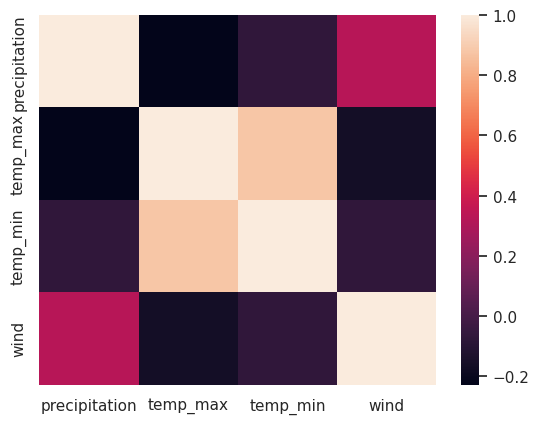

In [ ]:
#Correlation between Features
#How correlated are the features with each other?

df_correlations = weather_df.corr();
sns.heatmap(df_correlations);

In [7]:
weather_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [8]:
# We need to convert our target to numeric from text categories
le = LabelEncoder()
label = le.fit_transform(weather_df['weather'])

weather_df["weather_cat"] = label

#drop the original weather text
weather_df.drop("weather", axis=1, inplace=True)

In [9]:
weather_df

,date,precipitation,temp_max,temp_min,wind,weather_cat
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [10]:
# See the labels for each of the weather_cat to know which weather outcome each label is mapped to
e_dataframe = pd.DataFrame(le.classes_)
e_dataframe

,0
0,drizzle
1,fog
2,rain
3,snow
4,sun


# Classification - Logistic Regression Model

In [11]:
# Fit a logistic regression model and store the weather predictions.


#step 1: instantiate
logreg = LogisticRegression(max_iter=1000)

feature_cols = ['precipitation','temp_max','temp_min','wind']
X = weather_df[feature_cols]
y = weather_df['weather_cat']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#step 2 fit
logit_simple = logreg.fit(X_train, y_train)

#step 3: use features to predict & assign to variable
pred = logreg.predict(X_test)

In [36]:
# What is our accuracy on the test set?
print(f'Accuracy: {np.mean(y_test == logit_simple.predict(X_test))}')

accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.8415300546448088
Accuracy: 0.84


In [13]:
# calculate classification accuracy

acc = logit_simple.score(X_test,y_test)

print(f'Accuracy: {acc}')


Accuracy: 0.8415300546448088


# Decision Tree

In [14]:
# Random Forest Model Imports
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

In [19]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

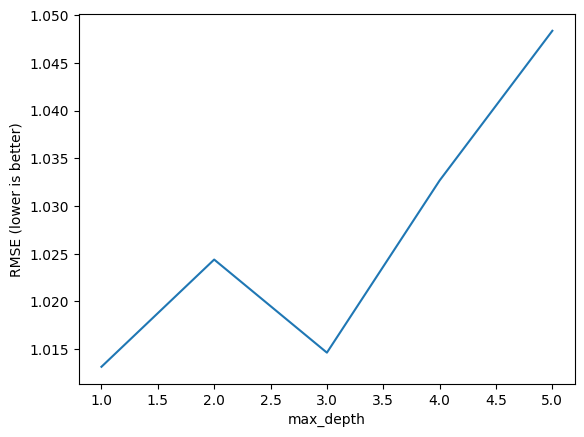

In [20]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [21]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, max_depth_range))

[(1.0131423156295893, 1),
 (1.0146238803055212, 3),
 (1.0243804953429823, 2),
 (1.0326696608226746, 4),
 (1.0483586723046803, 5)]

In [22]:
# max_depth=1 was best, so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=1)

In [24]:
# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,precipitation,1.0
1,temp_max,0.0
2,temp_min,0.0
3,wind,0.0


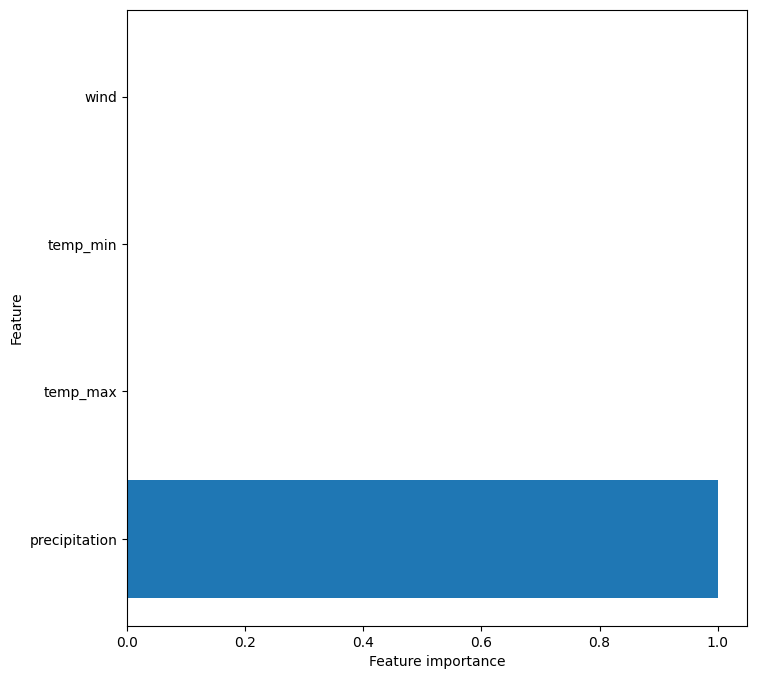

In [25]:
# plot the important features
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(treereg)

In [39]:
# Decision Tree Model
# instantiate and fit model (tree) - default parameters
dt_clf = DecisionTreeClassifier()

# fit the model
dt_clf.fit(X_train, y_train)
""
# evaluate model using the .score method
dt_clf.score(X_test, y_test)
DecisionTreeScore = dt_clf.score(X_test, y_test)

# Random Forest

In [26]:
# max_features=5 is best and n_estimators=150 is sufficiently large.
rfreg = RandomForestRegressor(n_estimators=150, max_features=4, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=150, oob_score=True,
                      random_state=1)

In [27]:
# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,precipitation,0.271499
1,temp_max,0.262624
2,temp_min,0.240757
3,wind,0.225120


In [28]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# Find the average RMSE.
scores = -cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(scores));

0.18585283269059494


In [29]:
# Check the shape of X.
X_train.shape

(1095, 4)

In [30]:
rfreg.fit(X_train, y_train).score(X_test, y_test)

0.17496072537894136

In [32]:
rand_forest = RandomForestClassifier(n_estimators = 100,
                            random_state = 0)

Rand_Forest_Score = rand_forest.fit(X_train, y_train).score(X_test, y_test)
print("Random Forest Score = ",Rand_Forest_Score)

Random Forest Score =  0.8169398907103825


# Results by Score

In [40]:
print("Logistic Regression Score = ",accuracy)
print("Decision Tree Score = ",DecisionTreeScore)
print("Random Forest Score = ",Rand_Forest_Score)

Logistic Regression Score =  0.8415300546448088
Decision Tree Score =  0.7622950819672131
Random Forest Score =  0.8169398907103825
